In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Define pi as constant
π = np.pi

In [5]:
D = 0.0069 #diffusion
l = 3
nx = 500
nt = 2800
T = 280
mu = 0.2
a = 0 
b = 0
c = 0
d = 6
surface_area = 28858

In [6]:
x = np.linspace(0,l,nx+1)
t = np.linspace(0,T,nt+1)

## Cleaned up code

In [7]:
def solution_(x,t,l,a,b,c,d,D,mu):
    a1 =       mu*a 
    b1 = 3*a + mu*b 
    c1 = 2*b + mu*c  
    d1 = c   + mu*d
    N = 1000
    n = np.arange(1, N+1)
    temp1 = np.zeros(N)
    for i in n:
        α = D*(i*π/l)**2 + mu
        qn = (
            1/α    * (a1*t**3    +   b1*t**2 +   c1*t + d1 * (1-np.exp(-α*t))) + 
            1/α**2 * (           - 3*a1*t**2 - 2*b1*t - c1 * (1-np.exp(-α*t))) +
            1/α**3 * (                         6*a1*t + 2*b1*(1-np.exp(-α*t))) +
            1/α**4 * (                                - 6*a1*(1-np.exp(-α*t)))
        )
        
        temp1[i-1] = np.sin(i*π*x/l)*(-1)**i*2/(i*π) *(d*np.exp(-α*t)+qn)
    V1 = temp1.sum()

    S1 = (x/l)*(a*t**3 +  b*t**2 + c*t + d)

    return S1+V1

In [8]:
def virus_count(t,l,a,b,c,d,D,mu):
    a1 =       mu*a 
    b1 = 3*a + mu*b 
    c1 = 2*b + mu*c  
    d1 = c   + mu*d
    N = 1000
    n = np.arange(1, N+1)
    temp1 = np.zeros(N)
    for i in n:
        α = D*(i*π/l)**2 + mu
        qn = (
            1/α    * ( a1*t**4/4 +  b1*t**3/3+   c1*t**2/2 + d1*t)+
            1/α**2 * (-a1*t**3   -   b1*t**2 -   c1*t - d1 * (1-np.exp(-α*t))) + 
            1/α**3 * (           + 3*a1*t**2 + 2*b1*t + c1 * (1-np.exp(-α*t))) +
            1/α**4 * (                       - 6*a1*t - 2*b1*(1-np.exp(-α*t))) +
            1/α**5 * (                                + 6*a1*(1-np.exp(-α*t)))
        )
        
        temp1[i-1] = (-1)**i*2/(l) *(d*(1-np.exp(-α*t))/α+qn) *D
    V1 = temp1.sum()

    S1 = D*(1/l)*(a*t**4/4 +  b*t**3/3 + c*t**2/2 + d*t)

    return S1+V1

In [9]:
virus_count(t[-1],l,a,b,c,d,D,mu)*28858

3.2981213879694913

In [10]:
TEST=np.logspace(-1.5,-0.3,20)
RESULT=[]

In [11]:
for i in TEST:
    temp=virus_count(t[-1],l,a,b,c,d,D,i)
    RESULT.append(temp*28858 )

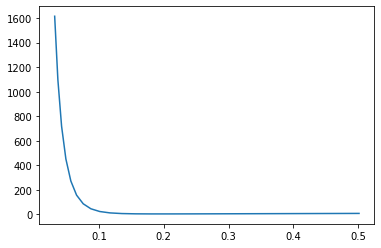

In [12]:
plt.plot(TEST,RESULT)

In [349]:
TEST

array([1.00000000e-05, 4.64158883e-05, 2.15443469e-04, 1.00000000e-03,
       4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 4.64158883e-01,
       2.15443469e+00, 1.00000000e+01])

In [345]:
np.logspace(-2,1,10)

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [408]:
10**(-0.3)

0.5011872336272722